/var/folders/h9/t_5ml32n67x_kgbhymld0b580000gn/T/ipykernel_34219/1692127226.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


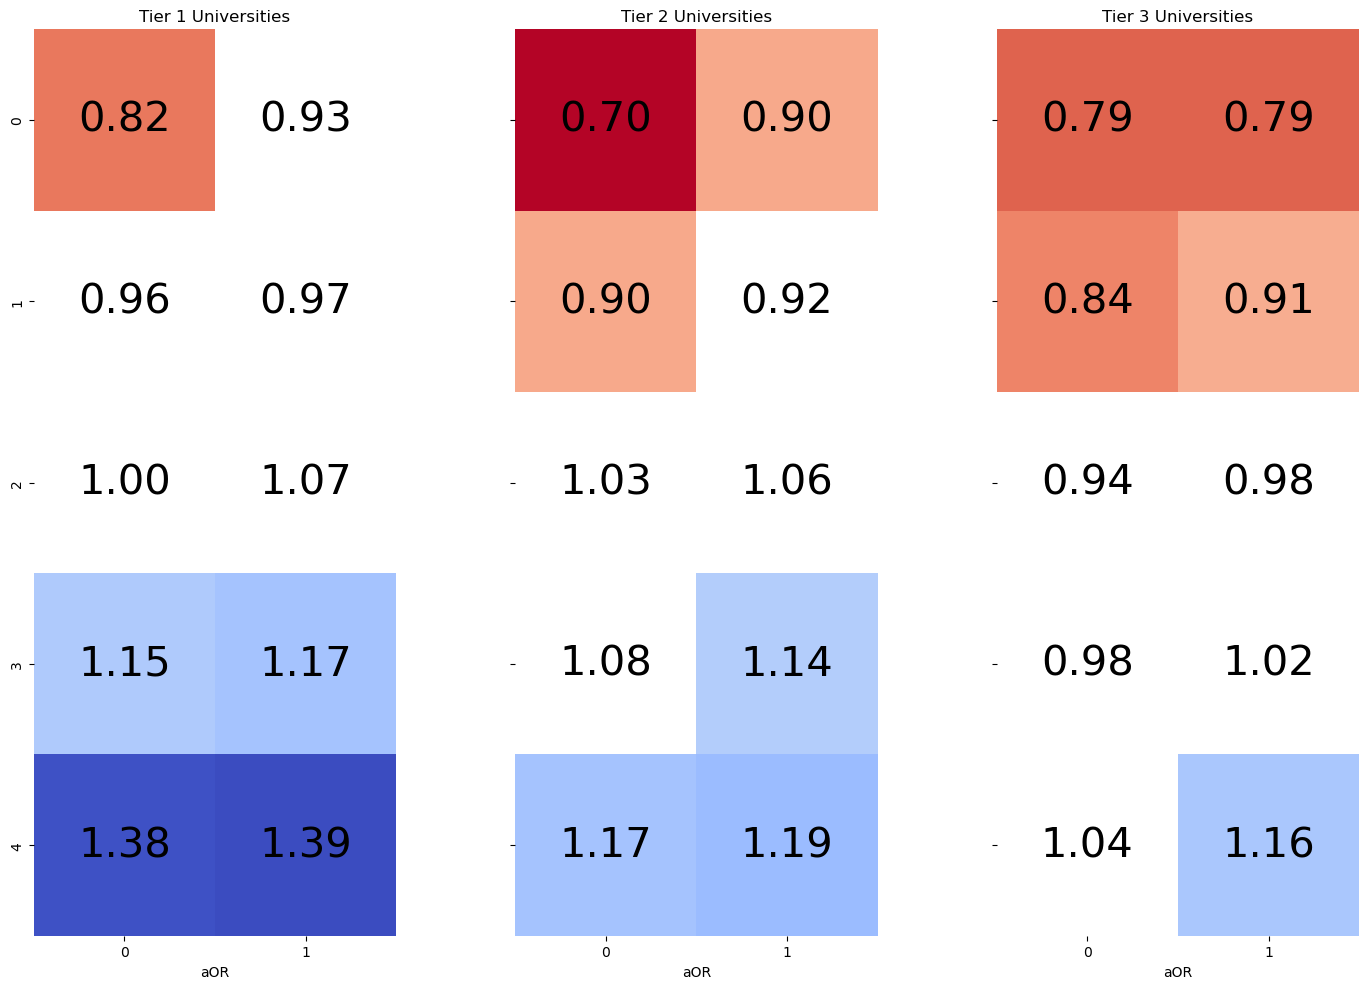

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# specify the location of your CSV file
file_path = 'analysed_data/Aff_individual_output_with_true_mean_as_base.csv'

# read the CSV file
df = pd.read_csv(file_path, sep=';')

# Replace comma with dot for numerical values and convert them to float
df['aOR'] = df['aOR'].str.replace(',', '.').astype(float)

# Add the row for University of Oxford to the DataFrame
new_row = {
    'aff_num': 'University of Oxford',
    'aOR': 1,
    'P>z': 1,
    'sig': 0,
    'Tier_himilo': 1
}
df = df.append(new_row, ignore_index=True)

# Update aOR values that were wrong due to rounding errors
df.loc[df['aff_num'] == 'Universidad de Chile', 'aOR'] = 1.02
df.loc[df['aff_num'] == 'University of Dhaka', 'aOR'] = 0.79
df.loc[df['aff_num'] == 'blind', 'aOR'] = 1.2

# Exclude 'blind' from DataFrame
df = df[df['aff_num'] != 'blind']

# Sort the values by 'Tier_himilo' and 'aOR' for a better visualization
df = df.sort_values(['Tier_himilo', 'aOR'])

# Calculate the global minimum and maximum aOR values
global_vmin = df['aOR'].min()
global_vmax = df['aOR'].max()

# Define subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes.flat):
    # Filter data by Tier_himilo
    tier_data = df[df['Tier_himilo'] == i+1]
    
    # Ensure we have even number of universities
    if tier_data.shape[0] % 2 != 0:
        print(f"Skipping tier {i+1} as it has odd number of universities.")
        continue

    # Reshape 'aOR' and 'sig' values to have two columns
    reshaped_aOR = tier_data['aOR'].values.reshape(-1, 2)
    reshaped_sig = tier_data['sig'].values.reshape(-1, 2)

    # Create a mask where 'sig' column is equal to 0
    mask = reshaped_sig == 0

    # Create a 2D heatmap (colored bar) with aOR values for each university,
    # use mask to color only rows where 'sig' equals to 1
    cmap = "coolwarm_r" # adjust colormap here
    sns.heatmap(reshaped_aOR, cmap=cmap, mask=mask, annot=True, fmt=".2f", cbar=False, ax=ax, square=True, annot_kws={'color':'black', 'size': 30}, vmin=global_vmin, vmax=global_vmax)

    # Overlay a heatmap to display annotations for all cells
    sns.heatmap(reshaped_aOR, cmap=cmap, mask=~mask, annot=True, fmt=".2f", cbar=False, ax=ax, square=True, annot_kws={'color':'black', 'size': 30}, alpha=0)

    ax.set_title(f'Tier {i+1} Universities')
    ax.set_xlabel('aOR')
    ax.set_ylabel('')

plt.tight_layout()

# Save the plot in high resolution
# Run this line only if you want to save the plot
# plt.savefig('/heatmap_export.png', dpi=900)


# Please note that some final design edits were made in PowerPoint to match the style of the other figures
# These adjustments are not included in the code and have no effect on the effect shown on the heatmap itself
plt.show()
